# Week 14 - Density-based Clustering and Dimensionality Reduction

This week, we continue with clustering and move on to the unsupervised learning problem of dimensionality reduction, which is good not only for making algorithms run faster but it can also provide some interesting ways to visualize data.

## Lecture 35 - Density-based Clustering

Here, we refer to the `scikit-learn` implementations of two clustering algorithms:

* DBSCAN (`sklearn.clustering.DBSCAN`) -- a method that build clusters based on local density of points
* OPTICS (`sklearn.clustering.OPTICS`) -- DBSCAN testing multiple neighborhood radii

We considered some examples in class from the `scikit-learn` documentation and *Data Mining and Machine Learning* by Zaki and Meira, Jr.

## Lecture 36 - PCA for Visualization and Variants of PCA

Let's import some libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

from tensorflow.keras.datasets import mnist

Let's apply PCA to the MNIST dataset to reduce it to 2 dimensions.

In [2]:
# read the MNIST data
(X, Y), _ = mnist.load_data()

# reshape the datapoints into rows
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

# create a PCA model with two components
pca = PCA(n_components = 2)

# transform the data
A = pca.fit_transform(X)

In [3]:
# print the amount of variance explained by each component
print(pca.explained_variance_ratio_)

[0.09704664 0.07095924]


Let's next visualize the first two principal components for MNIST.

Text(0.5, 1.0, '7.10% Explained Variance')

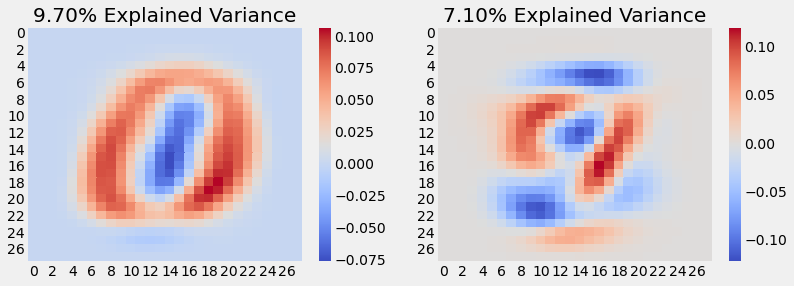

In [7]:
# set the style
plt.style.use('fivethirtyeight')

# declare a 1-by-2 plot
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

# plot heatmaps of PCA components and shape into a square
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='coolwarm')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='coolwarm')

# set chart titles
axarr[0].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100))
axarr[1].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100))